# 15. Тонкая настройка обучения моделей через метод compile()

In [1]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow import keras
from tensorflow.keras.datasets import cifar10, mnist
#from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

2024-12-04 22:18:08.695272: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-04 22:18:08.856997: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-04 22:18:08.903658: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
tf.random.set_seed(1)

(x_train, y_train), (x_test, y_test) = mnist.load_data()

#стандартизация данных
x_train = x_train.reshape(-1, 784) / 255
x_test = x_test.reshape(-1, 784) / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 702us/step - accuracy: 0.8811 - loss: 0.4091
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 685us/step - accuracy: 0.9662 - loss: 0.1086
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 709us/step - accuracy: 0.9780 - loss: 0.0711
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 706us/step - accuracy: 0.9843 - loss: 0.0528
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 691us/step - accuracy: 0.9877 - loss: 0.0400


In [3]:
model2 = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.CategoricalAccuracy()])

model2.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 767us/step - categorical_accuracy: 0.8941 - loss: 0.3539
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - categorical_accuracy: 0.9524 - loss: 0.1732
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - categorical_accuracy: 0.9592 - loss: 0.1500
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 726us/step - categorical_accuracy: 0.9653 - loss: 0.1344
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 702us/step - categorical_accuracy: 0.9650 - loss: 0.1325


In [4]:
#своя функция потерь

model3 = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

def myloss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=myloss,
              metrics=[keras.metrics.CategoricalAccuracy()])

model3.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 682us/step - categorical_accuracy: 0.8637 - loss: 0.0203
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 684us/step - categorical_accuracy: 0.9227 - loss: 0.0134
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - categorical_accuracy: 0.9128 - loss: 0.0164
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 677us/step - categorical_accuracy: 0.9092 - loss: 0.0175
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - categorical_accuracy: 0.9116 - loss: 0.0173


In [5]:
#своя функция потерь

model3 = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

class MyLoss(keras.losses.Loss):
    def __init__(self, alpha=1.0, beta=1.0):
        super().__init__()
        self.alpha = alpha
        self.beta = beta

    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(self.alpha*y_true - self.beta * y_pred))

model3.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=MyLoss(0.5, 0.2),
              metrics=[keras.metrics.CategoricalAccuracy()])

model3.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 730us/step - categorical_accuracy: 0.8034 - loss: 0.0128
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 719us/step - categorical_accuracy: 0.8091 - loss: 0.0128
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 694us/step - categorical_accuracy: 0.8203 - loss: 0.0126
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 690us/step - categorical_accuracy: 0.8300 - loss: 0.0124
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 707us/step - categorical_accuracy: 0.8360 - loss: 0.0123


In [10]:
#пользовательские метрики

model4 = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])

class MyLoss(keras.losses.Loss):
    def __init__(self, alpha=1.0, beta=1.0):
        super().__init__()
        self.alpha = alpha
        self.beta = beta

    def call(self, y_true, y_pred):
        return tf.reduce_mean(tf.square(self.alpha*y_true - self.beta * y_pred))
    
class CategoricalTruePositives(keras.metrics.Metric):
    def __init__(self, name='my_metric'):
        super().__init__(name=name)
        self.true_positives = self.add_weight(name='acc', initializer='zeros')
        self.count = tf.Variable(0.0)
        
    def update_state(self, y_true, y_pred, sample_weight=None):
        y_pred = tf.reshape(tf.argmax(y_pred, axis=1), shape=(-1, 1))
        y_true = tf.reshape(tf.argmax(y_true, axis=1), shape=(-1, 1))
        values = tf.cast(y_true, 'int32') == tf.cast(y_pred, 'int32')
        
        if sample_weight is not None:
            sample_weight = tf.cast(sample_weight, 'float32')
            values = tf.multiply(values, sample_weight)
            
        values = tf.cast(values, 'float32')
        
        self.true_positives.assign_add(tf.reduce_mean(values))
        self.count.assign_add(1.0)
        
    def result(self):
        return self.true_positives / self.count
    
    def reset_states(self):
        self.true_positives.assign(0.0)
        self.count.assign(0.0)
        

model4.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
              loss=MyLoss(0.5, 0.2),
              metrics=[keras.metrics.CategoricalAccuracy(), CategoricalTruePositives()])

model4.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 758us/step - categorical_accuracy: 0.8193 - loss: 0.0125 - my_metric: 0.8193
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 758us/step - categorical_accuracy: 0.8201 - loss: 0.0126 - my_metric: 0.2514
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 765us/step - categorical_accuracy: 0.8339 - loss: 0.0123 - my_metric: 0.1560
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 772us/step - categorical_accuracy: 0.8401 - loss: 0.0122 - my_metric: 0.1152
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 736us/step - categorical_accuracy: 0.8124 - loss: 0.0128 - my_metric: 0.0866


In [18]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#стандартизация данных
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


#вектор скрытого состояния
enc_input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(enc_input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
hidden_output = layers.Dense(8, activation='linear')(x)


#восстановление изображения
x = layers.Dense(7 * 7 * 8, activation='relu')(hidden_output)
x = layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(64, 5, strides=(2, 2), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Convolution2DTranspose(32, 5, strides=(2, 2), activation='linear', padding='same')(x)
x = layers.BatchNormalization()(x)
dec_output = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='dec_output')(x)

#классификация результата
x2 = layers.Dense(128, activation='relu')(hidden_output)
class_output = layers.Dense(10, activation='softmax', name='class_output')(x2)

model5 = keras.Model(enc_input, [dec_output, class_output])

model5.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
               loss = ['mean_squared_error', 'categorical_crossentropy'],
               metrics=['accuracy', 'accuracy'])

model5.fit(x_train, [x_train, y_train], epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - class_output_accuracy: 0.9066 - class_output_loss: 0.2924 - dec_output_accuracy: 0.7882 - dec_output_loss: 0.0556 - loss: 0.3481
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - class_output_accuracy: 0.9701 - class_output_loss: 0.1058 - dec_output_accuracy: 0.7977 - dec_output_loss: 0.0409 - loss: 0.1467
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - class_output_accuracy: 0.9732 - class_output_loss: 0.0998 - dec_output_accuracy: 0.7980 - dec_output_loss: 0.0399 - loss: 0.1397


In [ ]:
#вектор скрытого состояния
enc_input = layers.Input(shape=(28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu')(enc_input)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(64, 3, activation='relu')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Flatten()(x)
hidden_output = layers.Dense(8, activation='linear')(x)


#восстановление изображения
x = layers.Dense(7 * 7 * 8, activation='relu')(hidden_output)
x = layers.Reshape((7, 7, 8))(x)
x = layers.Conv2DTranspose(64, 5, strides=(2, 2), activation='relu', padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Convolution2DTranspose(32, 5, strides=(2, 2), activation='linear', padding='same')(x)
x = layers.BatchNormalization()(x)
dec_output = layers.Conv2DTranspose(1, 3, activation='sigmoid', padding='same', name='dec_output')(x)

#классификация результата
x2 = layers.Dense(128, activation='relu')(hidden_output)
class_output = layers.Dense(10, activation='softmax', name='class_output')(x2)

model7 = keras.Model(enc_input, [dec_output, class_output])

model7.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),
               loss = {
                   'dec_output' : 'mean_squared_error',
                   'class_output' : 'categorical_crossentropy'},
               loss_weights = [1.0, 0.5],
               metrics={
                   'dec_output' : None,
                   'class_output' : 'acc'
               })

model7.fit(x_train, [x_train, y_train], epochs=3)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
[7]


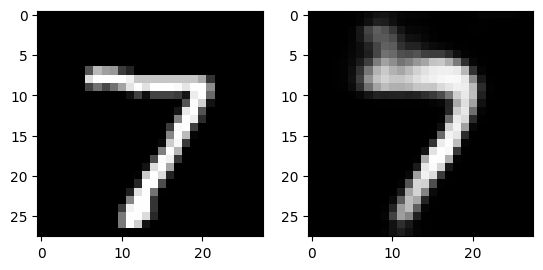

In [23]:
p = model7.predict(tf.expand_dims(x_test[0], axis=0))

print(tf.argmax(p[1], axis=1).numpy())


plt.subplot(121)
plt.imshow(x_test[0], cmap='gray')
plt.subplot(122)
plt.imshow(p[0].squeeze(), cmap='gray')
plt.show()